# Importing Libraries

In [1]:
import pandas as pd #for reading the csv files
import numpy as np #for implementing matrix operations
import matplotlib.pyplot as plt #To visualize data graphically

# Defining File Locations

In [2]:
location1='D:\\Madhvik 05\\Industrial training files\\bollywood_2010-2019.csv'
location2='D:\\Madhvik 05\\Industrial training files\\bollywood_meta_2010-2019.csv'
location3='D:\\Madhvik 05\\Industrial training files\\bollywood_ratings_2010-2019.csv'
location4='D:\\Madhvik 05\\Industrial training files\\bollywood_text_2010-2019.csv'

# Reading CSV files

In [3]:
movie_title=pd.read_csv(location1)
movie_meta=pd.read_csv(location2)
movie_ratings=pd.read_csv(location3)
movie_text=pd.read_csv(location4)
movie_title.shape

(980, 4)

# Data preprocessing

In [4]:
#movie_dataframe=pd.DataFrame(movie_file)
#credit_dataframe=pd.DataFrame(credit_file)

In [5]:
movie_dataset=movie_title.merge(movie_ratings,on='imdb_id')
movie_dataset=movie_dataset.merge(movie_meta,on='imdb_id')
movie_dataset=movie_dataset.merge(movie_text,on='imdb_id')
movie_dataset.to_csv('D:\\Madhvik 05\\Industrial training files\\save_bollywood_movie_file.csv')
movie_dataset.shape

(934, 18)

In [6]:
movie_dataset.drop_duplicates(keep='first',inplace=True)
movie_dataset.drop(['title_y','original_title'],axis=1,inplace=True)
movie_dataset.rename(columns={'title_x':'title'},inplace=True)
movie_dataset.columns


Index(['title', 'imdb_id', 'poster_path', 'wiki_link', 'imdb_rating',
       'imdb_votes', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'story', 'summary', 'tagline', 'actors', 'wins_nominations',
       'release_date'],
      dtype='object')

In [7]:
mean_votes= movie_dataset['imdb_votes'].mean()
print("mean votes=",mean_votes)
min_votes= movie_dataset['imdb_votes'].quantile(0.9)
#Selecting the movies that are having votes greater than 90th percentile
q_movies = movie_dataset.loc[movie_dataset['imdb_votes'] >= min_votes]
print("min votes= ",min_votes)
q_movies.shape



mean votes= 5959.035437430786
min votes=  16604.600000000006


(91, 16)

# Defining IMDB weighted average rating function

In [8]:
def weighted_rating(x, m=min_votes, C=mean_votes):
    v = x['imdb_votes']
    R = x['imdb_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
 
 
#Sorting movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Printing the top 15 movies
#q_movies[['original_title', 'vote_count', 'vote_average', 'score']].reset_index(drop=True).head(10)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
q_movies.to_csv('D:\\Madhvik 05\\Industrial training files\\save_bollywood_movie_file_with_score.csv')

In [10]:
q_movies[['title', 'imdb_votes', 'imdb_rating', 'score']].reset_index(drop=True).head(15)

,title,imdb_votes,imdb_rating,score
0,Manjhi – The Mountain Man,16622.0,8.0,2981.959509
1,Goliyon Ki Raasleela Ram-Leela,17246.0,6.4,2926.322553
2,Jab Harry Met Sejal,17317.0,5.3,2919.649425
3,Sonu Ke Titu Ki Sweety,17378.0,7.1,2915.338545
4,Ugly (film),17483.0,8.1,2906.893185
5,Secret Superstar,17698.0,7.9,2888.621096
6,Parmanu: The Story of Pokhran,18292.0,7.7,2839.481446
7,Hindi Medium,18315.0,7.8,2837.668725
8,Pyaar Ka Punchnama,18369.0,7.7,2833.246824
9,Ae Dil Hai Mushkil,18998.0,5.8,2782.313320


No handles with labels found to put in legend.


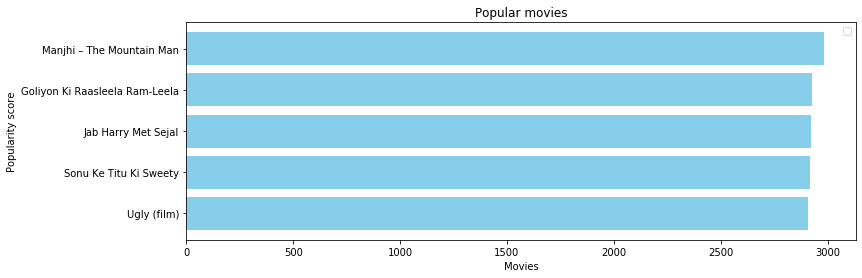

In [13]:
popular_movies=q_movies[['title', 'imdb_votes', 'imdb_rating', 'score']].reset_index(drop=True).head(5)
plt.figure(figsize=(12,4))
plt.barh(popular_movies['title'].head(6),popular_movies['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Movies')
plt.ylabel('Popularity score')
plt.title('Popular movies')
plt.legend()

# Content-Based Filtering (on story)

In [12]:
#Importing TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
movie_dataset['story'] =movie_dataset['story'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movie_dataset['story'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(916, 10490)

In [13]:
# Importing linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:
#Constructing a reverse map of indices and movie titles
indices = pd.Series(movie_dataset.index, index=movie_dataset['title']).drop_duplicates()

pd.DataFrame(indices).head(13)

,0
title,
Uri: The Surgical Strike,0
Battalion 609,1
The Accidental Prime Minister (film),2
Why Cheat India,3
Evening Shadows,4
Soni (film),5
Fraud Saiyaan,6
Bombairiya,7
Manikarnika: The Queen of Jhansi,8


In [15]:
def get_recomendation(title,cosine_sim =cosine_sim ):
    #Getting the index of the movie given its title
    idx=indices[title]
    #Getting the list of cosine similarity scores
    sim_scores=list(enumerate(cosine_sim[idx]))
    #sorting based on sim_score
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    # Getting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    #Getting the  movies indices 
    sim_scores=[i[0] for i in sim_scores]
     
    return movie_dataset[['title','actors','imdb_votes','imdb_rating']].iloc[sim_scores]

In [16]:
user_title=input('Enter your favourite movie: ')
db=get_recomendation(user_title)
db[['title','actors']]

Enter your favourite movie: Sarkar 3


,title,actors
176,Aa Gaya Hero,Govinda|Richa Sharma|Poonam Pandey|Sweta Sharm...
160,Golmaal Again,Ajay Devgn|Arshad Warsi|Tusshar Kapoor|Shreyas...
472,Jai Ho (film),Salman Khan|Daisy Shah|Tabu|Danny Denzongpa|Na...
208,Indu Sarkar,Kirti Kulhari|Tota Roy Chowdhury|Neil Nitin Mu...
220,Daddy (2017 film),Arjun Rampal|Aishwarya Rajesh|Nishikant Kamat|...
457,Kis Kisko Pyaar Karoon,Kapil Sharma|Simran Kaur Mundi|Manjari Fadnnis...
675,Goliyon Ki Raasleela Ram-Leela,Ranveer Singh|Deepika Padukone|Supriya Pathak|...
528,Hate Story 2,Jay Bhanushali|Surveen Chawla|Sushant Singh|Si...
274,Jai Gangaajal,Priyanka Chopra|Prakash Jha|Manav Kaul|Ninad K...
391,Roy (film),Arjun Rampal|Jacqueline Fernandez|Ranbir Kapoo...


# Content-Based Filtering (actors)

In [17]:
#Importing TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf2 = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
movie_dataset['actors'] =movie_dataset['actors'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix2 = tfidf.fit_transform(movie_dataset['actors'])

#Output the shape of tfidf_matrix
tfidf_matrix2.shape

(916, 4302)

In [18]:
# Importing linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix2, tfidf_matrix2)

In [19]:
#Constructing a reverse map of indices and movie titles
indices = pd.Series(movie_dataset.index, index=movie_dataset['title']).drop_duplicates()

pd.DataFrame(indices).head(13)

,0
title,
Uri: The Surgical Strike,0
Battalion 609,1
The Accidental Prime Minister (film),2
Why Cheat India,3
Evening Shadows,4
Soni (film),5
Fraud Saiyaan,6
Bombairiya,7
Manikarnika: The Queen of Jhansi,8


In [20]:
def get_recomendation2(title,cosine_sim =cosine_sim ):
    #Getting the index of the movie given its title
    idx=indices[title]
    #Getting the list of cosine similarity scores
    sim_scores=list(enumerate(cosine_sim[idx]))
    #sorting based on sim_score
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    # Getting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    #Getting the  movies indices 
    sim_scores=[i[0] for i in sim_scores]
     
    return movie_dataset[['title','actors','imdb_votes','imdb_rating']].iloc[sim_scores]

In [21]:
user_title=input('Enter your favourite movie: ')
i=indices[user_title]
print('Actors of ',user_title)
print(movie_dataset.loc[i]['actors'])
print('Recommended movies: ')
ds=get_recomendation2(user_title)
ds[['title','actors']]

Enter your favourite movie: Sarkar 3
Actors of  Sarkar 3
Amitabh Bachchan|Yami Gautam|Abhishek Bachchan|Jackie Shroff|Manoj Bajpayee|Amit Sadh|Rohini Hattangadi|Ronit Roy|Supriya Pathak|Bharat Dabholkar|Parag Tyagi|Bajrangbali Singh|
Recommended movies: 


,title,actors
440,All Is Well (2015 film),Rishi Kapoor|Abhishek Bachchan|Asin|Supriya Pa...
756,Bol Bachchan,Amitabh Bachchan|Ajay Devgn|Abhishek Bachchan|...
164,Kaabil,Hrithik Roshan|Yami Gautam|Ronit Roy|Rohit Roy...
454,Jazbaa,Aishwarya Rai Bachchan|Irrfan Khan|Shabana Azm...
431,Guddu Rangeela,Arshad Warsi|Amit Sadh|Ronit Roy|Aditi Rao Hyd...
880,Raavan,Abhishek Bachchan|Aishwarya Rai Bachchan|Govin...
809,Phhir,Rajniesh Duggall|Roshni Chopra|Monica|Adah Sha...
392,Badlapur (film),Varun Dhawan|Nawazuddin Siddiqui|Yami Gautam|H...
810,Aarakshan,Amitabh Bachchan|Saif Ali Khan|Manoj Bajpayee|...
843,Veer (2010 film),Salman Khan|Jackie Shroff|Mithun Chakraborty|Z...


In [22]:
csdf=pd.DataFrame(cosine_sim)
csdf.to_csv('D:\\Madhvik 05\\Industrial training files\\cosine_sim_matrix.csv')

In [23]:
print(tfidf_matrix2)

  (0, 472)	0.16436077983698943
  (0, 1744)	0.23488010813354218
  (0, 125)	0.23488010813354218
  (0, 106)	0.1891990218031271
  (0, 1136)	0.2215192468857929
  (0, 3678)	0.20468655242096678
  (0, 4240)	0.20468655242096678
  (0, 311)	0.26456748719010603
  (0, 3127)	0.2215192468857929
  (0, 3299)	0.1986787037205853
  (0, 3835)	0.2215192468857929
  (0, 2730)	0.2215192468857929
  (0, 2182)	0.1891990218031271
  (0, 3141)	0.1986787037205853
  (0, 1538)	0.1986787037205853
  (0, 1784)	0.08231715459964316
  (0, 2978)	0.1684851480080099
  (0, 1978)	0.18531784247283598
  (0, 1923)	0.18531784247283598
  (0, 1220)	0.15586481092097312
  (0, 4224)	0.17583816055537774
  (0, 2962)	0.18184600925575925
  (0, 2370)	0.16436077983698943
  (0, 3068)	0.15299761739017018
  (0, 2731)	0.15165245354318382
  :	:
  (914, 2208)	0.18412660786597856
  (914, 2129)	0.1629597875043416
  (914, 188)	0.15798484749271385
  (914, 570)	0.1952956153370429
  (914, 2702)	0.13542551040123424
  (915, 3753)	0.32528040570538325
  (915, 

In [24]:
cvtdf=pd.DataFrame(tfidf_matrix2)

In [25]:
cvtdf.to_csv('D:\\Madhvik 05\\Industrial training files\\tfidf.csv')

# Hybrid recommendation Model(Actor x Popularity)

In [26]:
# This hybrid model recommends movies based on content(genre) and popularity combined
def hybridmodel():
    actor_based_movie_dataset=get_recomendation2(user_title)
    actor_based_movie_dataset['score'] = actor_based_movie_dataset.apply(weighted_rating, axis=1)
    #Sorting movies based on score calculated above
    hybrid_dataset = actor_based_movie_dataset.sort_values('score', ascending=False)
    return hybrid_dataset[['title', 'imdb_votes', 'imdb_rating', 'score']].reset_index(drop=True).head(10)

In [30]:
user_title=input('Enter your favourite movie: ')
i=indices[user_title]
print('Actors of ',user_title)
print(movie_dataset.loc[i]['actors'])
print('Recommended movies: ')
hybridmodel()

Enter your favourite movie: Uri: The Surgical Strike
Actors of  Uri: The Surgical Strike
Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Gautam|Kirti Kulhari|Rajit Kapoor|Ivan Rodrigues|Manasi Parekh|Swaroop Sampat|Riva Arora|Yogesh Soman|Fareed Ahmed|Akashdeep Arora|Kallol Banerjee|
Recommended movies: 


,title,imdb_votes,imdb_rating,score
0,Sooper Se Ooper,156.0,4.3,5903.611483
1,Daas Dev,205.0,5.1,5886.424741
2,Bala (2019 film),1369.0,8.2,5505.776563
3,Dharam Sankat Mein,1822.0,6.2,5370.426244
4,Rann (film),2200.0,6.9,5262.679335
5,Batti Gul Meter Chalu,4169.0,6.1,4764.356237
6,Ki & Ka,4853.0,5.8,4612.610321
7,Mom (film),7355.0,7.3,4132.001007
8,Vicky Donor,36545.0,7.8,1867.040407
9,Sanju,42718.0,7.8,1673.571290


# Hybrid recommendation Model(Story x Popularity)

In [28]:
# This hybrid model recommends movies based on content(story) and popularity combined
def hybridmodel2():
    story_based_movie_dataset=get_recomendation(user_title)
    story_based_movie_dataset['score'] = story_based_movie_dataset.apply(weighted_rating, axis=1)
    #Sorting movies based on score calculated above
    hybrid_dataset = story_based_movie_dataset.sort_values('score', ascending=False)
    return hybrid_dataset[['title', 'imdb_votes', 'imdb_rating', 'score']].reset_index(drop=True).head(10)

In [29]:
user_title=input('Enter your favourite movie: ')
i=indices[user_title]
print('Actors of ',user_title)
print(movie_dataset.loc[i]['actors'])
print('Recommended movies: ')
hybridmodel2()

Enter your favourite movie: Uri: The Surgical Strike
Actors of  Uri: The Surgical Strike
Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Gautam|Kirti Kulhari|Rajit Kapoor|Ivan Rodrigues|Manasi Parekh|Swaroop Sampat|Riva Arora|Yogesh Soman|Fareed Ahmed|Akashdeep Arora|Kallol Banerjee|
Recommended movies: 


,title,imdb_votes,imdb_rating,score
0,Sukhmani: Hope for Life,26.0,5.7,5949.728093
1,Battalion 609,73.0,4.1,5932.969919
2,Raag Desh (film),341.0,8.3,5839.287492
3,Lamhaa,594.0,5.0,5753.396778
4,Ghost (2019 film),1379.0,8.7,5502.757909
5,Ankur Arora Murder Case,1406.0,6.5,5494.349929
6,Hind Ka Napak Ko Jawab: MSG Lion Heart 2,3960.0,6.8,4812.849646
7,Aligarh (film),4873.0,7.8,4608.774222
8,D-Day (2013 film),8421.0,7.2,3956.270020
9,Baby (2015 Hindi film),49426.0,8.0,1504.496519
